In [8]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader as DataLoader
import torch.nn as nn
import torch.optim as opt
from torch.autograd import Variable

import numpy as np
import matplotlib.pyplot as plt

In [1]:
# 超參數
num_epoch = 5
batch_size = 100
learning_rate = 0.005

In [3]:
train_dataset = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=False)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...



Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
train_loader = DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size,shuffle=False)

In [6]:
class AutoEncoder(nn.Module):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = nn.Sequential(
        nn.Linear(28*28, 128),
        nn.Tanh(), # -1~1
        nn.Linear(128, 64),
        nn.Tanh(),
        nn.Linear(64, 12),
        nn.Tanh(),
        nn.Linear(12, 3)
    )
    self.decoder = nn.Sequential(
        nn.Linear(3, 12),
        nn.Tanh(),
        nn.Linear(12, 64),
        nn.Tanh(),
        nn.Linear(64, 128),
        nn.Tanh(),
        nn.Linear(128, 28*28),
        nn.Sigmoid() # 0~1
    )

  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded, decoded

In [13]:
auto_encoder = AutoEncoder()
optimizer = opt.Adam(auto_encoder.parameters(), lr=learning_rate)
loss_func = nn.MSELoss()

In [12]:
view_data = Variable(test_dataset.data[:5].view(-1, 28*28).type(torch.FloatTensor)/255.0) #[:5]前五筆資料 只取data不含label

Epoch: 1, Batch: 100, Loss: 0.051567159593105316


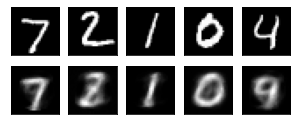

Epoch: 1, Batch: 200, Loss: 0.04624488204717636


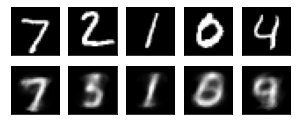

Epoch: 1, Batch: 300, Loss: 0.045085035264492035


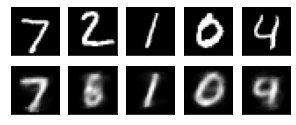

Epoch: 1, Batch: 400, Loss: 0.04175559803843498


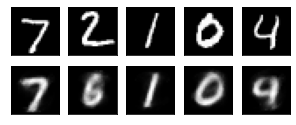

Epoch: 1, Batch: 500, Loss: 0.04250514507293701


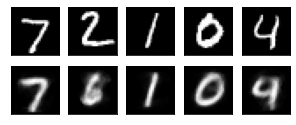

Epoch: 1, Batch: 600, Loss: 0.038337431848049164


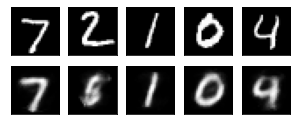

Epoch: 2, Batch: 100, Loss: 0.037979207932949066


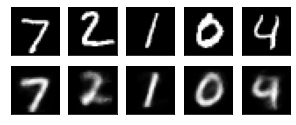

Epoch: 2, Batch: 200, Loss: 0.0391811728477478


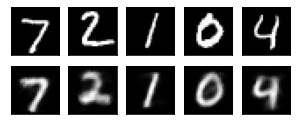

Epoch: 2, Batch: 300, Loss: 0.03775510936975479


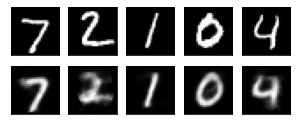

Epoch: 2, Batch: 400, Loss: 0.03573079779744148


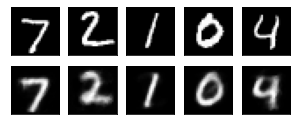

Epoch: 2, Batch: 500, Loss: 0.03455471992492676


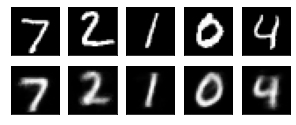

Epoch: 2, Batch: 600, Loss: 0.03766164556145668


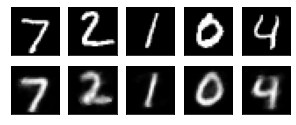

Epoch: 3, Batch: 100, Loss: 0.036940332502126694


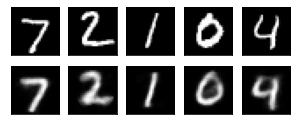

Epoch: 3, Batch: 200, Loss: 0.034915801137685776


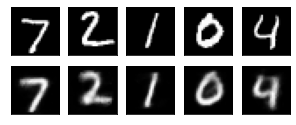

Epoch: 3, Batch: 300, Loss: 0.03793984651565552


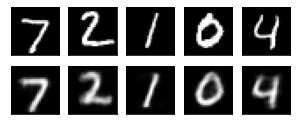

Epoch: 3, Batch: 400, Loss: 0.03510484844446182


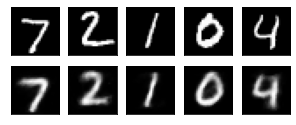

Epoch: 3, Batch: 500, Loss: 0.03319176658987999


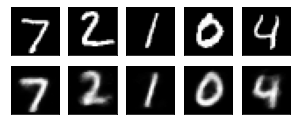

Epoch: 3, Batch: 600, Loss: 0.03343307226896286


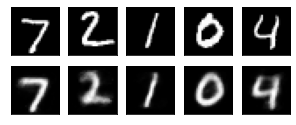

Epoch: 4, Batch: 100, Loss: 0.034969888627529144


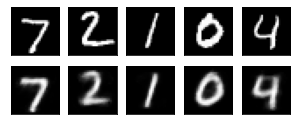

Epoch: 4, Batch: 200, Loss: 0.03224034979939461


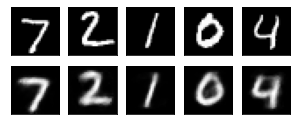

Epoch: 4, Batch: 300, Loss: 0.031973209232091904


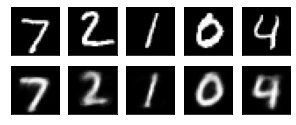

Epoch: 4, Batch: 400, Loss: 0.03506368771195412


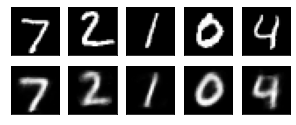

Epoch: 4, Batch: 500, Loss: 0.03636975213885307


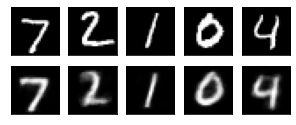

Epoch: 4, Batch: 600, Loss: 0.03285641595721245


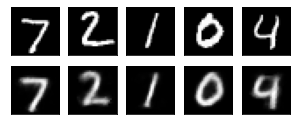

Epoch: 5, Batch: 100, Loss: 0.03269273415207863


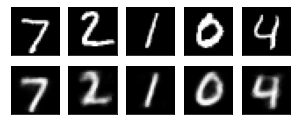

Epoch: 5, Batch: 200, Loss: 0.03544396534562111


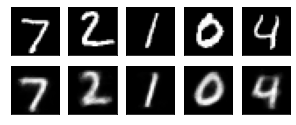

Epoch: 5, Batch: 300, Loss: 0.03723873943090439


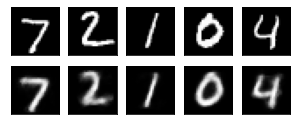

Epoch: 5, Batch: 400, Loss: 0.03236827254295349


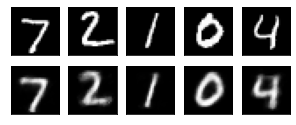

Epoch: 5, Batch: 500, Loss: 0.03679699823260307


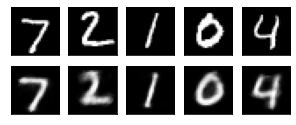

Epoch: 5, Batch: 600, Loss: 0.03376419097185135


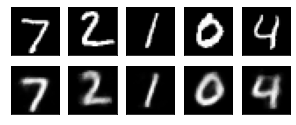

In [17]:
for epoch in range(num_epoch):
  for i, (images, labels) in enumerate(train_loader):
    x = Variable(images.view(-1, 28*28))
    y = Variable(images.view(-1, 28*28))
    encoded, decoded = auto_encoder(x)

    loss = loss_func(decoded, y) # calculate loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print('Epoch: {}, Batch: {}, Loss: {}'.format(epoch+1, i+1, loss.data))
      figure, index = plt.subplots(2, 5, figsize=(5, 2)) # row, col, and figzise is (2, 5)
      _, decoded_data = auto_encoder(view_data) # _ is encoded which we don't need here.
      for j in range(5): # 5張圖

        # view_data from variable tensor to numpy. 
        # numpy reshape to image original size. (28, 28)
        
        # row1
        index[0][j].imshow(np.reshape(view_data.data.numpy()[j], (28, 28)), cmap='gray')
        index[0][j].set_xticks(())
        index[0][j].set_yticks(())

        # row2
        index[1][j].imshow(np.reshape(decoded_data.data.numpy()[j], (28, 28)), cmap='gray')
        index[1][j].set_xticks(())
        index[1][j].set_yticks(())

      plt.draw()
      plt.show()